In [17]:
import pandas as pd
import seaborn as sns

# name of TSV file

tsv_file = 'MAP Protocol_VS_A_ADMI_005_M1_VSA.tsv'

In [18]:
# import TSV

df = pd.read_csv(tsv_file, sep='\t')

In [ ]:
# filter out rows with no X or Y gaze point coordinate

df = df[(df['GazePointX (ADCSpx)'].notnull()) & (df['GazePointY (ADCSpx)'].notnull() == True)]

In [4]:
# find the gaze path x lower limit

def x_lower_lim():
    df_x_min = df['GazePointX (ADCSpx)'].min()
    if (df_x_min >= 0): return df_x_min * 0.95
    else: return df_x_min * 1.05

# find the gaze path x upper limit

def x_upper_lim():
    df_x_max = df['GazePointX (ADCSpx)'].max()
    if (df_x_max >= 0): return df_x_max * 1.05
    else: return df_x_max * 0.95

# find the gaze path y lower limit

def y_lower_lim():
    df_y_min = df['GazePointY (ADCSpx)'].min()
    if (df_y_min >= 0): return df_y_min * 0.95
    else: return df_y_min * 1.05

# find the gaze path y upper limit

def y_upper_lim():
    df_y_max = df['GazePointY (ADCSpx)'].max()
    if (df_y_max >= 0): return df_y_max * 1.05
    else: return df_y_max * 0.95

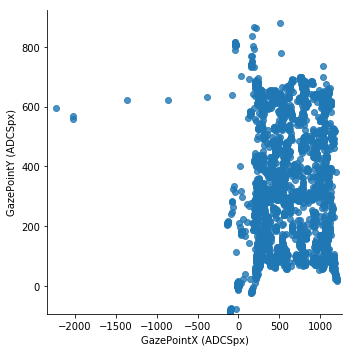

In [5]:
df_lmplot = sns.lmplot('GazePointX (ADCSpx)', 'GazePointY (ADCSpx)', data=df, fit_reg = False)
# kdeplot = sns.kdeplot(df['GazePointY (ADCSpx)'], df['GazePointX (ADCSpx)'])
df_lmplot.set(xlim=(x_lower_lim(),x_upper_lim()))
df_lmplot.set(ylim=(y_lower_lim(),y_upper_lim()))

In [19]:
def get_trial_list():
    return df["StudioEventData"].unique()

trial_list = get_trial_list()
for x in range(len(trial_list)):
  print(trial_list[x])
  print(" ")

nan
 
Instruction Element
 
Array 6  5A 1TD.bmp
 
Social Array 1  1 to 5.bmp
 
Social Array 6  5 to 1.bmp
 
Array 4  3A 3TD.bmp
 
Social Array 4  3 to 3.bmp
 
Array 1  1A 5TD.bmp
 


In [21]:
def extract_trial(trial_name):
  start_index = df["StudioEventData"].ne(trial_name).idxmax()
  end_index = df["StudioEventData"].ne(trial_list[trial_list.index(trial_name)+1]).idxmax()
  return df

df_extracted = extract_trial("Social Array 1  1 to 5.bmp")
df_extracted

AttributeError: 'numpy.ndarray' object has no attribute 'index'